#### 1. Loading required Libraries

In [1]:
import numpy as np               # Linear Algebra
import pandas as pd              # Data Handling
import seaborn as sns            # Visualization
import matplotlib.pyplot as plt  # Visualization
from datetime import date        # Use Year
import warnings                  # For warnings
warnings.filterwarnings('ignore')

#### 2. Importing dataset into 'cars' dataframe

In [2]:
cars = pd.read_csv("../datasets/Car_details_v3.csv")
cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


#### 3. Description of Dataset

#### 3.1 Shape of Dataset

In [3]:
shape = cars.shape
print(f"There are \033[1m {shape[0]} rows\patterns \033[0m and \033[1m{shape[1]} features\033[0m.")

There are  8128 rows\patterns  and 13 features.


#### 3.2 info

In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


#### 3.3 Missing Values for features

In [5]:
[[features,cars[features].isnull().sum()] for features in cars.columns if cars[features].isnull().sum()>0]

[['mileage', 221],
 ['engine', 221],
 ['max_power', 215],
 ['torque', 222],
 ['seats', 221]]

#### 3.4 Heat Map for Missing Values

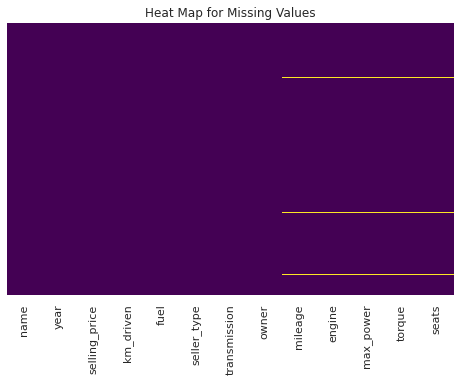

In [6]:
fig = sns.set(rc={'figure.figsize': (8, 5)})
plt.title("Heat Map for Missing Values")
sns.heatmap(cars.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

#### 3.5 Dropping NA values

In [7]:
cars.dropna(inplace=True)

Approximately, **2% values are Na**. Therefore, to simplify things, we dropped them.

#### 4. Exploratory Data Analysis

#### 4.1.1. Type of Owner and Number of Cars

In [8]:
cars['owner'].value_counts()

First Owner             5215
Second Owner            2016
Third Owner              510
Fourth & Above Owner     160
Test Drive Car             5
Name: owner, dtype: int64

#### 4.1.2. Countplot Owner Type Vs Number of Cars

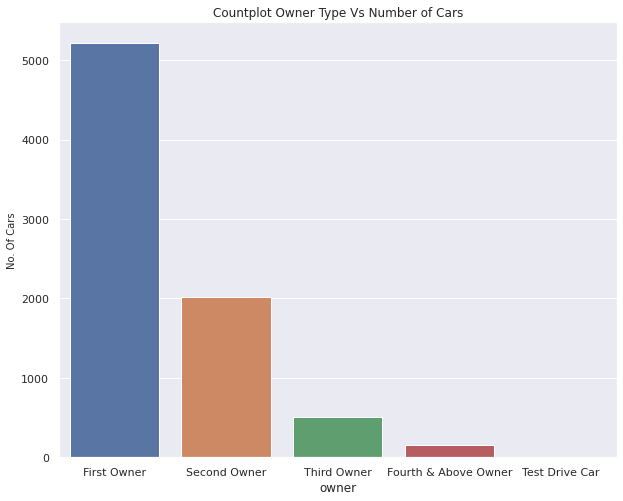

In [9]:
fig = sns.set(rc={'figure.figsize': (10, 8)})
plt.title("Countplot Owner Type Vs Number of Cars")
sns.countplot(x ='owner', data = cars).set_ylabel("No. Of Cars", fontsize = 10)
plt.show()

#### Observation
**First Owned Cars** are **highest among all**.

#### 4.1.4. Pie Chart Type of Owner Vs Number of cars.

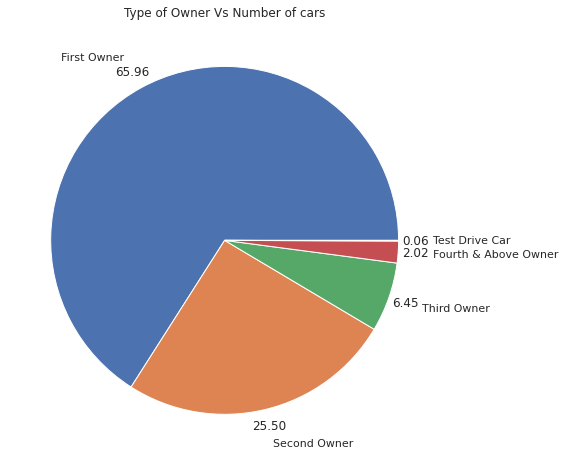

In [10]:
fig = sns.set(rc={'figure.figsize': (10, 8)})
plt.title("Type of Owner Vs Number of cars")
plt.pie(cars['owner'].value_counts(),labels=cars['owner'].unique(),pctdistance=1.1, labeldistance=1.2,autopct='%.2f')
plt.show()

#### Observation

1. **65.96 %** of cars are **First Owned**.
2. **25.50 %** of cars are **Second Owned**.
3. **6.45 %** of cars are **Third Owned**.
4. **2.02 %** of cars are **Fourth and Above Owned**.
5. **0.06 %** of cars are **Test Drive Cars**.

#### 4.2. Barplot Owner Vs Selling Price

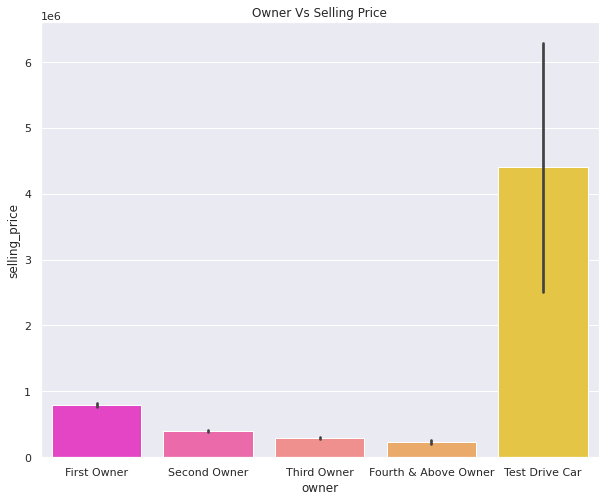

In [11]:
fig = sns.set(rc={'figure.figsize': (10, 8)})
plt.title("Owner Vs Selling Price")
sns.barplot(x='owner',y='selling_price',data=cars,palette='spring')
plt.show()

#### Observation

**Test Drive cars** have **high average selling price**. 

As **number of owners** increases the **selling price** of car **decreases**.

#### 4.3.1. Automatic Vs Manual

In [12]:
cars['transmission'].value_counts()

Manual       6865
Automatic    1041
Name: transmission, dtype: int64

#### 4.3.2. Countplot Transmission Vs Number of Cars

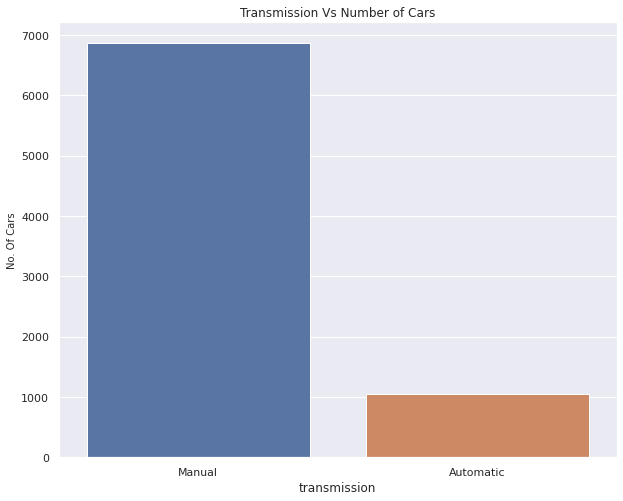

In [13]:
fig = sns.set(rc={'figure.figsize': (10, 8)})
plt.title("Transmission Vs Number of Cars")
sns.countplot(x ='transmission', data = cars).set_ylabel("No. Of Cars", fontsize = 10)
plt.show()

#### Observation

Most of the cars are **Manual**.

#### 4.4. Barplot Transmission Vs Selling Price

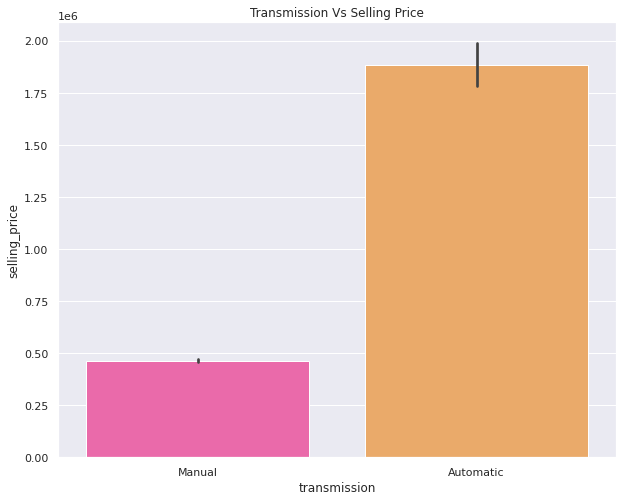

In [14]:
fig = sns.set(rc={'figure.figsize': (10, 8)})
plt.title("Transmission Vs Selling Price")
sns.barplot(x='transmission',y='selling_price',data=cars,palette='spring')
plt.show()

#### Observation

Cars having **Automatic Transmission have high selling price**.

#### 4.5. Countplot Fuel Vs Number of Cars

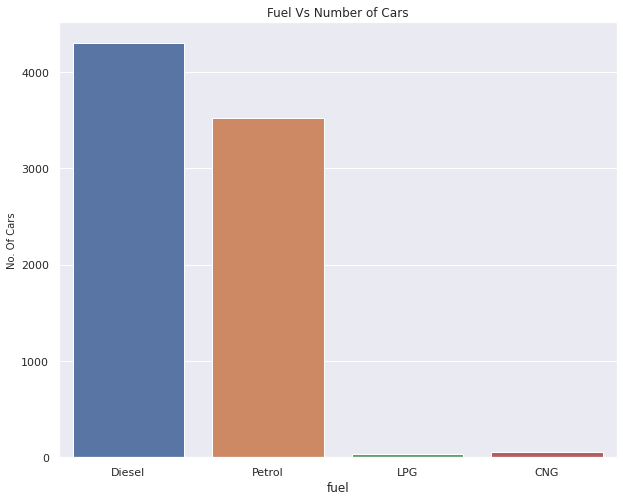

In [15]:
fig = sns.set(rc={'figure.figsize': (10, 8)})
plt.title("Fuel Vs Number of Cars")
sns.countplot(x ='fuel', data = cars).set_ylabel("No. Of Cars", fontsize = 10)
plt.show()

#### Observation

Most of the cars are **Diesel**.

#### 4.6. Barplot Fuel Vs Selling Price

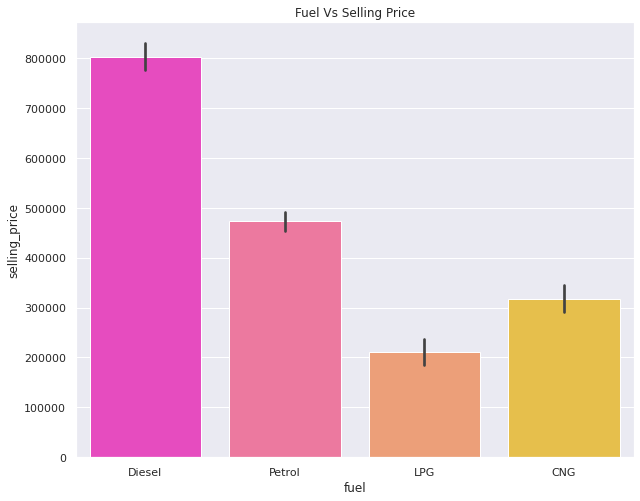

In [16]:
fig = sns.set(rc={'figure.figsize': (10, 8)})
plt.title("Fuel Vs Selling Price")
sns.barplot(x='fuel',y='selling_price',data=cars,palette='spring')
plt.show()

#### Observation

**Diesel cars** have **high average selling price**.

#### 4.7. Countplot Number of cars sold per year.

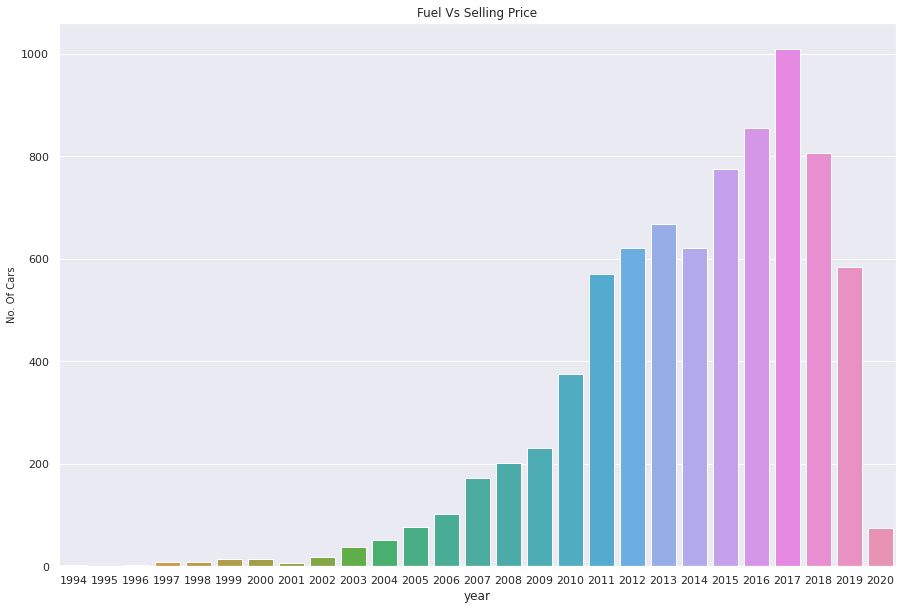

In [17]:
fig = sns.set(rc={'figure.figsize': (15, 10)})
plt.title("Fuel Vs Selling Price")
sns.countplot(x ='year', data = cars).set_ylabel("No. Of Cars", fontsize = 10)
plt.show()

#### Observation

In the year 2017, Most of the cars were sold.

#### 5. Feature Engineering

In [18]:
def feature_eng(cars):
    
    # extracts the company name from name column
    #cars["company"] = cars["name"].str.split().str.slice(start=0,stop=1).str.join(' ')
    
    # extracts the model name from name column
    #cars["model"] = cars["name"].str.split().str.slice(start=1,stop=2).str.join(' ')
    
    cars["name"] = cars["name"].str.split().str.slice(start=1,stop=2).str.join(' ')
    
    # We compute age of car and store it in the age columns
    cars["age"] = date.today().year - cars.year
    
    # extracting numbers from mileage and converting into float
    cars["mileage_kmpl"] = cars.mileage.str.extract(r'(^[0-9]*.[0-9]*)').astype("float64")
    
    # extracting numbers from max_power and converting into float
    cars["max_power_bhp"] = cars.max_power.str.extract(r'(^[0-9]*.[0-9]*)').astype("float64")
    
    # extracting numbers from engine and converting into int
    cars["engine_cc"] = cars.engine.str.extract(r'(^[0-9]*.[0-9]*)').astype(int)
    
    # We encode the owner categories in the order : 
    # 'Test Drive Car' > 'First Owner' > 'Second Owner' > 'Third Owner' > 'Fourth & Above Owner'
    cars["owner"] = cars.owner.map({'Test Drive Car': 5, 'First Owner': 4, 'Second Owner': 3, 'Third Owner': 2, 'Fourth & Above Owner': 1})
    
    # Encoding Transmission values
    cars["transmission_manual"] = cars.transmission.map({'Manual': 1, 'Automatic': 0})

    # Encoding Seller Information in the order: 
    # 'Individual' < 'Dealer' < 'Trustmark Dealer'
    cars["seller_type"] = cars.seller_type.map({'Trustmark Dealer': 3, 'Dealer': 2, 'Individual': 1})

    # converting column seats into int
    cars["seats"] = cars.seats.astype(int)
    
    # columns to remove
    remove_cols = ["year", "mileage","engine","torque","max_power","transmission"]
    
    # removing the columns
    cars.drop(columns =remove_cols, inplace=True)
    
    return cars

In [19]:
cars = feature_eng(cars)
cars.head()

,name,selling_price,km_driven,fuel,seller_type,owner,seats,age,mileage_kmpl,max_power_bhp,engine_cc,transmission_manual
0,Swift,450000,145500,Diesel,1,4,5,8,23.40,74.00,1248,1
1,Rapid,370000,120000,Diesel,1,3,5,8,21.14,103.52,1498,1
2,City,158000,140000,Petrol,1,2,5,16,17.70,78.00,1497,1
3,i20,225000,127000,Diesel,1,4,5,12,23.00,90.00,1396,1
4,Swift,130000,120000,Petrol,1,4,5,15,16.10,88.20,1298,1


#### 6. Model Fitting

#### 6.1. Splitting Data into X and y

In [20]:
X = cars.drop(columns =['selling_price'])
y = cars['selling_price']

#### 6.2. Importing libraries for model fitting

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#### 6.3. Pipeline

#### 6.3.1. One Hot Encoding

In [22]:
ohe = OneHotEncoder()
ohe.fit(X[['name','fuel']])

OneHotEncoder()

In [23]:
column_trans = make_column_transformer(
    (OneHotEncoder(categories=ohe.categories_),['name','fuel']),
    remainder='passthrough')

#### 6.3.2. Standard Scaler

In [24]:
scaler = StandardScaler(with_mean=False)

#### 6.3.3. Regression Models

In [25]:
# Linear Regression
lr = LinearRegression()

# Alpha values
alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

# Ridge and Lasso
ridgecv = RidgeCV(alphas=alphas,cv=4)
lassocv = LassoCV(alphas=alphas,cv=4,normalize=True)

#### 6.3.4. Pipeline Structure

In [26]:
pipe = make_pipeline(column_trans, scaler,lr)
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['3', '5', '6', '7', '800', 'A-Star', 'A3', 'A4', 'A6', 'Accent',
       'Accord', 'Alto', 'Amaze', 'Ameo', 'Aria', 'Aspire', 'Astra',
       'Aveo', 'Avventura', 'B', 'BR-V', 'BRV', 'Baleno', 'Beat',
       'Bolero', 'Bolt', 'Brio', 'CLA', 'CLASSIC', 'CR-V'...
       'Venue', 'Verito', 'Verna', 'Vitara', 'WR-V', 'Wagon', 'Winger',
       'Wrangler', 'X1', 'X3', 'X4', 'X5', 'X6', 'X7', 'XC40', 'XC60',
       'XC90', 'XE', 'XF', 'XL6', 'XUV300', 'XUV500', 'Xcent', 'Xenon',
       'Xylo', 'Yaris', 'Yeti', 'Zen', 'Zest', 'i10', 'i20'], dtype=object),
                                                                            array(['CNG', 'Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'fuel'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('linearregression', LinearRegression())])

#### 7. Functions

#### 7.1 For converting big values into readable form

In [27]:
def format_float(num):
    return np.format_float_positional(round(num,2), trim='-')

#### 7.2. Returns Dataframe consisting all errors

In [28]:
def metrics(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    dict_ = {
        "MAE": [format_float(mae)],
        "MSE": [format_float(mse)],
        "RMSE": [format_float(rmse)],
        "R2": [(r2)]
    }

    results = pd.DataFrame(dict_)
    results.index = ["Values"]

    return results

#### 7.3. For Training model

In [29]:
def train_model(X, y, transformer, scaler, model):
    X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
    pipe = make_pipeline(transformer, scaler, model)
    pipe.fit(X_train, Y_train)
    y_pred = pipe.predict(x_test)
    
    return metrics(y_test,y_pred), pipe

#### 8. Train

In [30]:
metrics, pipe = train_model(X, y, column_trans, scaler, lr)
metrics

,MAE,MSE,RMSE,R2
Values,106739.11,42682804193.98,206598.17,0.926512


#### 9. Dumping into pickle

In [31]:
import pickle

In [32]:
pickle.dump(pipe,open('../pickle/LinearRegressionModel.pkl','wb'))

#### 10. Prediction

#### 10.1. Input from User

In [37]:
name = "Maruti Swift"
year = 2014
km_driven = 145500
fuel = "Diesel"
seller_type = "Individual"
transmission = "Manual"
owner = "First Owner"
mileage = 23.4
engine = 1248
max_power = 74
torque = ""
seats = 5

#### 10.2. User Input to Dataframe

In [38]:
dict_ = {
            "name": [name],
            "year": [year],
            "km_driven": [km_driven],
            "fuel":[fuel],
            "seller_type": [seller_type],
            "transmission": [transmission],
            "owner": [owner],
            "mileage": [str(mileage) + " kmpl"],
            "engine":[str(engine) + " CC"],
            "max_power":[str(max_power) + " bmph"],
            "torque":[torque],
            "seats":[seats]
        }

results = pd.DataFrame(dict_)

#### 10.3. Passing to Feature Engineering

In [39]:
results = feature_eng(results)

#### 10.4. Prediction Result

In [40]:
pipe.predict(results)

array([437301.2627377])

#### 11. References

https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b

https://www.geeksforgeeks.org/seaborn-lineplot-method-in-python/

https://stackoverflow.com/questions/21572870/matplotlib-percent-label-position-in-pie-chart

https://stackoverflow.com/questions/20681864/lasso-on-sklearn-does-not-converge

https://machinelearninghd.com/ridgecv-regression-python/

https://www.geeksforgeeks.org/convert-string-to-float-in-python/

https://www.digitalocean.com/community/tutorials/python-convert-string-to-float

https://www.w3schools.com/python/ref_func_round.asp

https://stackoverflow.com/questions/52008548/python-running-into-x-test-y-test-fit-errors

https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html

https://www.kaggle.com/getting-started/146568

https://github.com/scikit-learn/scikit-learn/blob/a24c8b46/sklearn/preprocessing/label.py#L39

https://stackoverflow.com/questions/48929124/scikit-learn-how-to-compose-labelencoder-and-onehotencoder-with-a-pipeline

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02#:~:text=Use%20StandardScaler%20if%20you%20want,okay%20with%20transforming%20your%20data.

https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe

https://analyticsindiamag.com/complete-guide-to-handling-categorical-data-using-scikit-learn/

https://pbpython.com/categorical-encoding.html

https://www.geeksforgeeks.org/get-unique-values-from-a-column-in-pandas-dataframe/

https://sparkbyexamples.com/pandas/pandas-convert-column-to-int/

https://www.geeksforgeeks.org/python-program-to-convert-a-list-to-string/

https://www.geeksforgeeks.org/split-a-text-column-into-two-columns-in-pandas-dataframe/

https://www.youtube.com/watch?v=VqKq78PVO9g

https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_pipeline_display.html#:~:text=The%20default%20configuration%20for%20displaying,set_config(display%3D'text')%20.

https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

https://www.geeksforgeeks.org/what-is-the-difference-between-pipeline-and-make_pipeline-in-scikit/

https://github.com/krishnaik06/Pipelines-Using-Sklearn/blob/master/SklearnPipeline.ipynb

https://www.youtube.com/watch?v=w9IGkBfOoic

https://github.com/rajtilakls2510/car_price_predictor/blob/master/Quikr%20Analysis.ipynb

https://www.youtube.com/watch?v=iRCaMnR_bpA&t=144s